<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/examples_bank/6_clasificacion/asignacion_parcial_2_regresion_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Clasificación binaria con el dataset de florez de iris 

## [Video de apoyo](https://www.youtube.com/watch?v=mny9T2esp4A)

# Dataset inicial: load_iris  

# TAREA  

Caso 1: Constuir un clasificador binario detector de virgínica  (One_vs_Rest)  
Caso 2: Constuir un clasificador binario versicolor vs virginica  (One_vs_One)

# ATRIBUTOS   

Caso 1:  
atributo 1: Longitud de sépalo  
atributo 2: ancho de sépalo  

Caso 2:  
atributo 1: Longitud de pétalo  
atributo 2: ancho de pétalo  

Caso 3:  
atributo 1: Producto entre longitud y ancho de sépalo  
atributo 2: Producto entre longitud y ancho de pétalo  

# MODELOS  
Caso 1: SGDClassifier y LogisticRegression  
Caso 2: SGDClassifier y KNeighborsClassifier  
Caso 3: LogisticRegression y KNeighborsClassifier  

## Parciales:    

{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 1}    
{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 2}   
{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 3}   
{TAREA: Caso 1, ATRIBUTOS: Caso 2, MODELOS: Caso 1}   
{TAREA: Caso 1, ATRIBUTOS: Caso 2, MODELOS: Caso 2}     
{TAREA: Caso 1, ATRIBUTOS: Caso 2, MODELOS: Caso 3}     
{TAREA: Caso 1, ATRIBUTOS: Caso 3, MODELOS: Caso 1}     
{TAREA: Caso 1, ATRIBUTOS: Caso 3, MODELOS: Caso 2}     
{TAREA: Caso 1, ATRIBUTOS: Caso 3, MODELOS: Caso 3}    
{TAREA: Caso 2, ATRIBUTOS: Caso 1, MODELOS: Caso 1}    
{TAREA: Caso 2, ATRIBUTOS: Caso 1, MODELOS: Caso 2}   
{TAREA: Caso 2, ATRIBUTOS: Caso 1, MODELOS: Caso 3}     
{TAREA: Caso 2, ATRIBUTOS: Caso 2, MODELOS: Caso 1}     
{TAREA: Caso 2, ATRIBUTOS: Caso 2, MODELOS: Caso 2}     
{TAREA: Caso 2, ATRIBUTOS: Caso 2, MODELOS: Caso 3}     
{TAREA: Caso 2, ATRIBUTOS: Caso 3, MODELOS: Caso 1}     
{TAREA: Caso 2, ATRIBUTOS: Caso 3, MODELOS: Caso 2}     
{TAREA: Caso 2, ATRIBUTOS: Caso 3, MODELOS: Caso 3}     

# Paso a paso 

## Punto 1

*  Tome el dataset `load_iris` y constituya el arreglo de imágenes $\mathbf{X}$ y el de etiquetas $\mathbf{y}$ como arreglos de numpy de valores de tipo `float64`.   

*  Divida el dataset `(X,y)` en cuatro subconjuntos `X_train, X_test, y_train, y_test` para entrenamiento y prueba del modelo predictivo de clasificación que se le asigne, pero para esta tarea relice muestreo estratificado utilizando la clase `StratifiedShuffleSplit` del `model_selection` de Sklearn. 

## Punto 2

* Después de haber seleccionado los atributos predictores asignados, escale los datos utilizando la clase `MaxMinScaler` o la clase `StandardScaler` del módulo `preprocessing` de sklearn. 

* Instancie y entrene los modelos asignados.   

## Punto 3 

Para la selección de modelos utilice la metodología de validación cruzada y para esta puntuación utilice la función `cross_val_predict` del módulo `model_selection` de sklearn con 10 hojas de validación(`cv = 10`).

y mida el desempeño en el conjunto de entrenamiento con la función `f1_score` del módulo `metrics` de Sklearn. 

 

 y luego afine el modelo seleccionado con la metodología de Grilla de hiperparámetros (`GridSearchCV(scoring = 'f1_macro'`)). 

* Para el `SGDClassifier` utilice los hiperparámetros:
  * `alpha` con valores `[10**-1, 10**-2]`, 
  * `learning_rate` con valores en la lista `['constant']`, 
  * `eta0` con valores en la lista `[0.1,0.01, 0.001]` y 
  * `penalty` con valores en la lista `['l1', 'l2']`.

* Para el `KNeighborsClassifier` utilice los hiperparámetros:
  * `n_neighbors` con valores en la lista `[3,4,5,6,7]`, 
  * `weights` con valores en la lista `['uniform', 'distance']`.

* Para `LogisticRegression` utilice los hiperparámetros:
  * `penalty` con valores en la lista `['l2']`, y  
  * `C` con valores en la lista `[10**0, 10**-1, 10**-2]`. 

* Capture el mejor modelo utilizando el atributo de inspección `best_estimator_`

## Punto 4

* Verifique que el desempeño en el conjunto de testeo es cercano al determinado en el conunto de entrenamiento.   

* cuantifique el desmpeño de su modelo final en el conjunto de testeo usando el método `f1_score(y_test, y_test_pred)`

# Solución del Caso I

{TAREA: Caso 1, ATRIBUTOS: Caso 1, MODELOS: Caso 1}    
Constuir un clasificador binario detector de **virginica**   
atributo 1: **Longitud de sépalo**  
atributo 2: **ancho de sépalo**   
Modelos: **SGDClassifier** y **LogisticRegression**  


# Librerías necesarias

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

#obtención de datos 
from sklearn.datasets import load_iris 

# automatizar la selección de atributos 
from sklearn.base import BaseEstimator, TransformerMixin 

# muestreo estratificado
from sklearn.model_selection import StratifiedShuffleSplit

#modelos a seleccionar
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 

# para el criterio de selección de modelos
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score 

# para afinamiento del modelo
from sklearn.model_selection import GridSearchCV 


# Obtención de los datos 

In [ ]:
X,y = load_iris(return_X_y = True) 

In [ ]:
X[0,2]*X[0,3]

# Selección de los atributos predictores 

In [ ]:
class Selecciona_Atributos(BaseEstimator, TransformerMixin):
    def __init__(self, sepal_length = True, sepal_width = True, \
                petal_length = False, petal_width = False,\
                sepal_area = False, petal_area = False):
        self.sepal_length = sepal_length
        self.sepal_width = sepal_width
        self.petal_length = petal_length
        self.petal_width = petal_width
        self.sepal_area = sepal_area
        self.petal_area = petal_area 
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        sepal_length, sepal_width, petal_length, petal_width = 0,1,2,3
        if self.sepal_length:
            a = X[:,sepal_length]
        else:
            a = np.array([0])
        if self.sepal_width:
            b = X[:,sepal_width]
        else:
            b = np.array([0])
        if self.petal_length:
            c = X[:,petal_length]
        else:
            c = np.array([0])  
        if self.petal_width:
            d = X[:,petal_width]
        else:
            d = np.array([0])
        if self.sepal_area:
            e = X[:,sepal_length]*X[:,sepal_width]
        else:
            e = np.array([0])
        if self.petal_area:
            f = X[:,petal_length]*X[:,petal_width]
        else:
            f = np.array([0])    
            
        atributos = [a,b,c,d,e,f]  
        lista_atributos_seleccionados = []
        for atributo in atributos:
            if atributo.any():
                lista_atributos_seleccionados.append(atributo) 
        return np.c_[lista_atributos_seleccionados].T        

In [ ]:
Seleccionador_Atributos = selecciona_atributos(sepal_length = False, sepal_width = False, \
                                               petal_length = False, petal_width = False,\
                                               sepal_area = True, petal_area = True )

In [ ]:
X_selecionados = seleccionador_atributos.fit_transform(X)

In [ ]:
X = X_selecionados

In [ ]:
X.shape 

In [ ]:
X[0]

# Configuración de las etiquetas para un detector de vigínicas 

In [ ]:
y_virginica = (y==2)

In [ ]:
y = y_virginica 

# Dividir en entrenamiento y testeo de manera estratificada 

In [ ]:
sss = StratifiedShuffleSplit(n_splits = 1, random_state = 42, test_size = 0.1 ) 

In [ ]:
for train_index, test_index in sss.split(X,y):
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index] 

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,3, figsize = (20,6))

ax[0].hist(y*1)
ax[0].grid() 
ax[1].hist(y_train*1)
ax[1].grid() 
ax[2].hist(y_test*1) 
ax[2].grid() 

plt.savefig('estratificado.jpg')

plt.show() 

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
escalador = StandardScaler() 

In [ ]:
escalador.fit(X_train)

In [ ]:
X_train_escalado = escalador.transform(X_train) 

In [ ]:
X_train= X_train_escalado 

In [ ]:
sgd_clf = SGDClassifier(max_iter = 1000, random_state = 42, tol = 1e-3) 
lr_clf = LogisticRegression() 

In [ ]:
sgd_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

In [ ]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train,y_train, cv = 10)
y_train_pred_lr = cross_val_predict(lr_clf, X_train,y_train, cv = 10)

In [ ]:
f1_score(y_train,y_train_pred_sgd)


In [ ]:
f1_score(y_train,y_train_pred_lr)


Tomaremos o seleccionaremos el modelo SGDClassifier como el mejor 

In [ ]:
grid_param_lr = {'penalty':['l2'],\
                'C':[10**0, 10**-1, 10**-2]}

#* Para `LogisticRegression` utilice los hiperparámetros:
#  * `penalty` con valores en la lista `['l2']`, y  
#  * `C` con valores en la lista `[10**0, 10**-1, 10**-2]`. 

In [ ]:
grid_param_sgd = {'alpha':[10**-1, 10**-2], \
             'learning_rate':['constant'],\
             'eta0':[0.1,0.01, 0.001],
             'penalty':['l1', 'l2']}

# * Para el `SGDClassifier` utilice los pararámetros de `alpha` 
# con valores `[10**-1, 10**-2]`,\
# `learning_rate` con valores en la lista `['constant']`, 
# `eta0` con valores en la lista `[0.1,0.01, 0.001]` y `penalty` 
# con valores en la lista `['l1', 'l2']`.


In [ ]:
grid_param_knn = {'n_neighbors':[3,4,5,6,7],\
                 'weights':['uniform', 'distance']}

#Para el KNeighborsClassifier utilice los hiperparámetros:
#    n_neighbors con valores en la lista [3,4,5,6,7],
#    weights con valores en la lista ['uniform', 'distance'].



In [ ]:
grid_search = GridSearchCV(sgd_clf, grid_param_sgd, cv = 10, scoring = 'f1_macro',\
                          return_train_score=True)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
mejor_modelo = grid_search.best_estimator_

In [ ]:
y_train_pred_sgd = cross_val_predict(mejor_modelo, X_train,y_train, cv = 10)

In [ ]:
f1_score(y_train, y_train_pred_sgd)

In [ ]:
X_test_escalado = escalador.transform(X_test)

In [ ]:
y_test_pred_sgd = mejor_modelo.predict(X_test_escalado) 

In [ ]:
f1_score(y_test,y_test_pred_sgd)

# Grafiquemos los datos y la recta clasificadora determinada

In [ ]:
plt.scatter(X[:,1][y==False], X[:,3][y==False])
plt.scatter(X[:,1][y==True], X[:,3][y==True])

plt.savefig('mejor_predictores.jpg')

# Configuración de los datos para un clasificador de Virgínica y versicolor

In [ ]:
X,y = load_iris(return_X_y = True) 

In [ ]:
iris = load_iris() 

In [ ]:
iris.target_names 

In [ ]:
X = np.vstack((X[y==1], X[y==2])) 

In [ ]:
X.shape 

In [ ]:
y = y[50:]

In [ ]:
y

In [ ]:
y.shape

Por lo tanto, los nuevos arreglos de numpy X y y estan configurados para un clasificados de versicolor y virgínica. 

# TAREA: Caso 2, ATRIBUTOS: Caso 1, MODELOS: Caso 1

## TAREA Caso 2: Constuir un clasificador binario versicolor vs virginica (One_vs_One)

In [ ]:
vv = pd.DataFrame(np.c_[X,y], columns = list(iris.feature_names) + ['tipo_iris'] ,\
                  index = np.arange(100))

In [ ]:
vv.head(1)

## ATRIBUTOS

### Caso 1:
atributo 1: Longitud de sépalo  
atributo 2: ancho de sépalo 

# MODELOS   

### Caso 1: SGDClassifier y LogisticRegression 

In [ ]:
Seleccionador_Atributos = selecciona_atributos(sepal_length = True, sepal_width = True, \
                                               petal_length = False, petal_width = False,\
                                               sepal_area = False, petal_area = False )

In [ ]:
X = Seleccionador_Atributos.fit_transform(X)

In [ ]:
X.shape 

# Ejemplo de construcción de un modelo de clasificación binaria con solo dos atributos predictores: área de sépalo y área de pétalo

## [Video de apoyo](https://www.youtube.com/watch?v=lPnQoccz3Qk) 

## Obtener los datos 

In [2]:
from sklearn.datasets import load_iris  

In [3]:
iris = load_iris() 

In [4]:
iris.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X,y = load_iris(return_X_y = True) 

In [10]:
sepal_area = X[:,0:1]*X[:,1:2]

In [11]:
sepal_area

array([[17.85],
       [14.7 ],
       [15.04],
       [14.26],
       [18.  ],
       [21.06],
       [15.64],
       [17.  ],
       [12.76],
       [15.19],
       [19.98],
       [16.32],
       [14.4 ],
       [12.9 ],
       [23.2 ],
       [25.08],
       [21.06],
       [17.85],
       [21.66],
       [19.38],
       [18.36],
       [18.87],
       [16.56],
       [16.83],
       [16.32],
       [15.  ],
       [17.  ],
       [18.2 ],
       [17.68],
       [15.04],
       [14.88],
       [18.36],
       [21.32],
       [23.1 ],
       [15.19],
       [16.  ],
       [19.25],
       [17.64],
       [13.2 ],
       [17.34],
       [17.5 ],
       [10.35],
       [14.08],
       [17.5 ],
       [19.38],
       [14.4 ],
       [19.38],
       [14.72],
       [19.61],
       [16.5 ],
       [22.4 ],
       [20.48],
       [21.39],
       [12.65],
       [18.2 ],
       [15.96],
       [20.79],
       [11.76],
       [19.14],
       [14.04],
       [10.  ],
       [17.7 ],
       [

In [9]:
petal_area = X[:,2]*X[:,3]

# Configuración de nuestros predictores 

In [10]:
import numpy as np 
X_area = np.c_[sepal_area,petal_area]

In [13]:
X_area.shape

(150, 2)

# Configuración de las etiquetas para un detector de setosa 

In [14]:
y_setosa = (y==0)

In [17]:
y_setosa = y_setosa.reshape(-1,1)

In [22]:
y_setosa = y_setosa.ravel() 

In [23]:
y_setosa 


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
iris.target_names 

In [30]:
y_setosa = 1*y_setosa

In [31]:
y_setosa 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Visualización a través de una dataframe de los atributos predictores y las etiquetas para nuestro detectos de setosa con los atributos predictores de area de sepalo y pétalo

In [32]:
import pandas as pd 
df = pd.DataFrame(np.c_[X_area, y_setosa],\
                  columns = ['área_sepalo', 'área_pétalo', 'es_setosa'],\
                  index = np.arange(150)) 

df.iloc[45:55,:]

,área_sepalo,área_pétalo,es_setosa
45,14.40,0.42,1.0
46,19.38,0.32,1.0
47,14.72,0.28,1.0
48,19.61,0.30,1.0
49,16.50,0.28,1.0
50,22.40,6.58,0.0
51,20.48,6.75,0.0
52,21.39,7.35,0.0
53,12.65,5.20,0.0
54,18.20,6.90,0.0


# División en entrenamiento y testeo de manera estratificada

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [51]:
sss = StratifiedShuffleSplit(n_splits = 1, random_state = 42, test_size = 0.2)

In [52]:
for train_index, test_index in sss.split(X_area, y_setosa):
    X_train, X_test = X_area[train_index], X_area[test_index]
    y_train, y_test = y_setosa[train_index], y_setosa[test_index] 
    

(array([20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

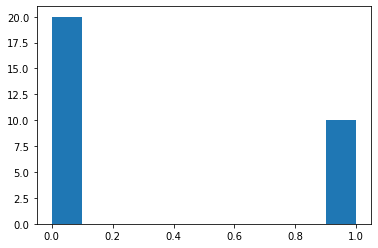

In [53]:
import matplotlib.pyplot as plt 
plt.hist(y_test)

In [54]:
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 

In [55]:
sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state = 42) 
lr_clf = LogisticRegression(max_iter = 200) 
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [56]:
sgd_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import f1_score 

In [78]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred_train_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv = 5)
y_pred_train_lr = cross_val_predict(lr_clf, X_train, y_train, cv = 5)
y_pred_train_knn = cross_val_predict(knn_clf, X_train, y_train, cv = 5)

In [79]:
confusion_matrix(y_train, y_pred_train_sgd)
 

array([[80,  0],
       [ 0, 40]], dtype=int64)

In [80]:
confusion_matrix(y_train, y_pred_train_lr)
 

array([[80,  0],
       [ 0, 40]], dtype=int64)

In [81]:
confusion_matrix(y_train, y_pred_train_knn)
 

array([[80,  0],
       [ 0, 40]], dtype=int64)

In [59]:
puntaje_f1_sgd = f1_score(y_train, y_pred_train_sgd)
puntaje_f1_sgd 

1.0

In [60]:
puntaje_f1_lr = f1_score(y_train, y_pred_train_lr)
puntaje_f1_lr 

1.0

In [61]:
puntaje_f1_knn = f1_score(y_train,y_pred_train_knn)
puntaje_f1_knn

1.0

In [64]:
from sklearn.metrics import roc_curve 

In [65]:
X_sgd,Y_sgd,Z_sgd = roc_curve(y_train, y_pred_train_sgd)
X_lr,Y_lr,Z_lr = roc_curve(y_train, y_pred_train_lr)
X_knn,Y_knn,Z_knn = roc_curve(y_train, y_pred_train_knn)

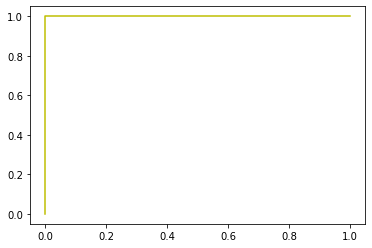

In [70]:
import matplotlib.pyplot as plt 

plt.plot(X_sgd, Y_sgd, color = 'red') 
plt.plot(X_lr, Y_lr, color = 'g')
plt.plot(X_knn, Y_knn, color = 'y')

# Verificar el desempeño en el conjunto de testeo 

In [71]:
y_pred_test = sgd_clf.predict(X_test)

In [72]:
f1_score(y_test, y_pred_test) 

1.0

## Deducción de la recta separadora

In [73]:
sgd_clf.intercept_

array([-0.04040395])

In [74]:
sgd_clf.coef_.ravel() 

array([  11.31049483, -158.40130506])

In [75]:
np.hstack((sgd_clf.intercept_, sgd_clf.coef_.ravel() ))

array([-4.04039484e-02,  1.13104948e+01, -1.58401305e+02])

In [76]:
w0,w1,w2 = np.hstack((sgd_clf.intercept_, sgd_clf.coef_.ravel()))

$$ w0 + w1x + w2y = 0 $$

$$ y = -\frac{w1}{w2}x - \frac{w0}{w2} $$

# Visualización de esta clasificación a través de un diagrama de dispersión

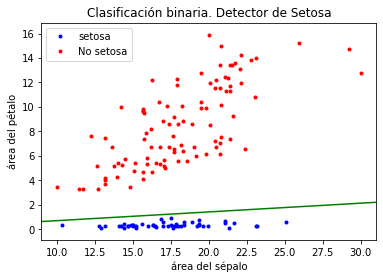

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

ax.set_title('Clasificación binaria. Detector de Setosa')
ax.set_xlabel('área del sépalo')
ax.set_ylabel('área del pétalo')

ax.plot(X_area[:,0][1*y_setosa==1], X_area[:,1][y_setosa==1], 'b.', label = 'setosa')
ax.plot(X_area[:,0][1*y_setosa==0], X_area[:,1][y_setosa==0], 'r.', label = 'No setosa')

#trazo de linea separadora

c,d = np.min(X_area[:,0])-1,np.max(X_area[:,0])+1
m = -w1/w2
b = -w0/w2
ax.plot([c,d],[m*c+b, m*d+b], 'g-')

#rectángulo de visualización

ax.axis([np.min(X_area[:,0])-1, np.max(X_area[:,0])+1, \
         np.min(X_area[:,1])-1, np.max(X_area[:,1])+1] )

ax.legend() 

plt.savefig('clasificador_area.jpg') 

plt.show() 

**Conclusión: **  

* Hemos encontrado una recta que separa de manera perfecta a las dos clases: la clase Setosa de la clase no setosa. 

## Referentes:

* La clase LogisticRegression de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  

* La clase KNeighborsClassifier de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* Sobre las medidas de desempeño de un clasificador: https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/  

* Sobre la función subplots(): https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
